# Homework 3 


## Group I

Anna Kurek - 01444623  
Linyun Huang - 01379982  
Mark O'Shea - 01384962  
Mingyang Tham - 01428168  
Rejpal Matharu - 01367169  
Yiting Wang - 01423116


### Question 1

For both Karate Club and Class networks, we calculated the community structures using two methods. The Girvan Newman method, which focuses on betweenness, and the Louvain Community package which finds the best modularity partition.

These two methods gave very different results. The Girvan Newman method seemed more suitable to the Karate Club, while the best modularity partition is more suitable for the Class.

We began by importing the necessary libraries, then loading in and structuring the data. G1 corresponds to the Karate Club, while G2 corresponds to the Class.

In [2]:
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
import community

G1 = nx.read_edgelist(r'zachary_karate_club.txt', nodetype=str , create_using=nx.Graph(), data=(('weight',float),))


df = pd.ExcelFile(r'HW2_who_talks_to_whom.xlsx')
df = df.parse(df.sheet_names[0]).fillna(0).replace(['-'], [0]).drop('Nodes', 1)
df = df.stack().reset_index()
df.iloc[:, 0] = df.iloc[:, 0] + 1
df.columns = ['source', 'target','weight']
df = df.loc[ (df['weight'] != 0) & (df['source'] != 16) & (df['target'] != 16)]
G2 = nx.from_pandas_dataframe(df, create_using=nx.Graph())

### Karate Club

The code and graph for the Girvan Newman method:

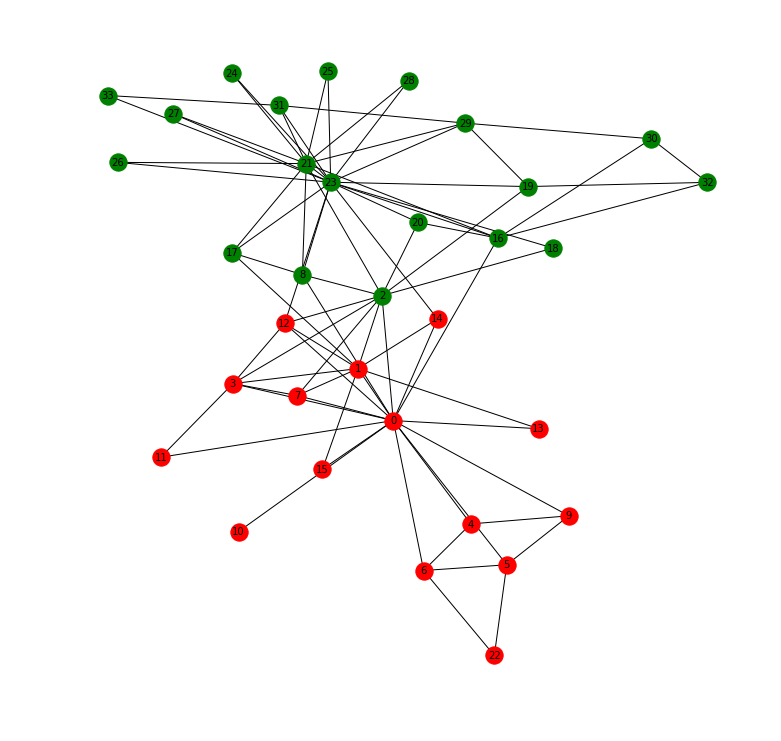

In [4]:
comp = girvan_newman(G1)
x=tuple(sorted(c) for c in next(comp))

plt.figure(figsize=(13,13))
pos = nx.spring_layout(G1)
nx.draw_networkx_nodes(G1,pos,nodelist=x[1],node_color='green')
nx.draw_networkx_nodes(G1,pos,nodelist=x[0],node_color='red')
nx.draw_networkx_labels(G1,pos,font_size=10,font_family='sans-serif')
nx.draw_networkx_edges(G1,pos)
plt.axis('off')
plt.show()



The code and graph for the Louvain best partition method:

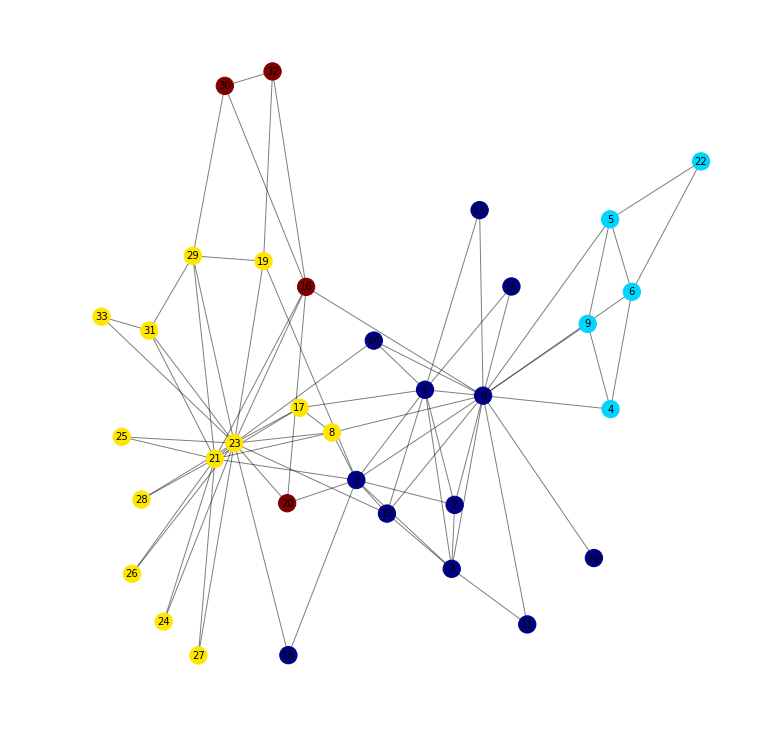

In [5]:
part = community.best_partition(G1)
values = [part.get(node) for node in G1.nodes()]
values[0]=values[2]
values[1]=values[3]


plt.figure(figsize=(13,13))
pos=nx.spring_layout(G1)
nx.draw_networkx_nodes(G1,pos,cmap = plt.get_cmap('jet'),node_color = values )
nx.draw_networkx_labels(G1,pos,font_size=10,font_family='sans-serif')
nx.draw_networkx_edges(G1,pos,alpha=0.5)
plt.axis('off')
plt.show()



As seen above, the Girvan Newman method separates the Karate Club into two communities. We know from background context that this club has two main figures who are at the centre of these two communities. The Girvan Newman method's use of betweenness is appropriate for identifying these two groups as they centre around the two main figures.

The Louvain best partition method creates four communities. It appears to have identified two clusters within each of the two larger communities from before.


### Class network

The code and graph for the Girvan Newman method:

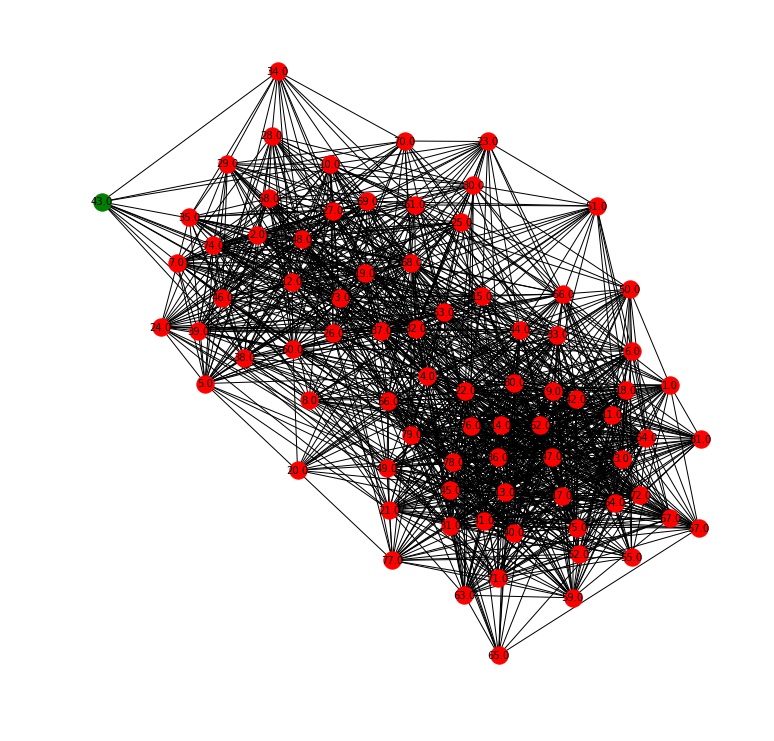

In [7]:
comp = girvan_newman(G2)
x=tuple(sorted(c) for c in next(comp))

plt.figure(figsize=(13,13))
pos = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2,pos,nodelist=x[1],node_color='green')
nx.draw_networkx_nodes(G2,pos,nodelist=x[0],node_color='red')
nx.draw_networkx_labels(G2,pos,font_size=10,font_family='sans-serif')
nx.draw_networkx_edges(G2,pos)
plt.axis('off')
plt.show()

The code and graph for the Louvain best partition method:

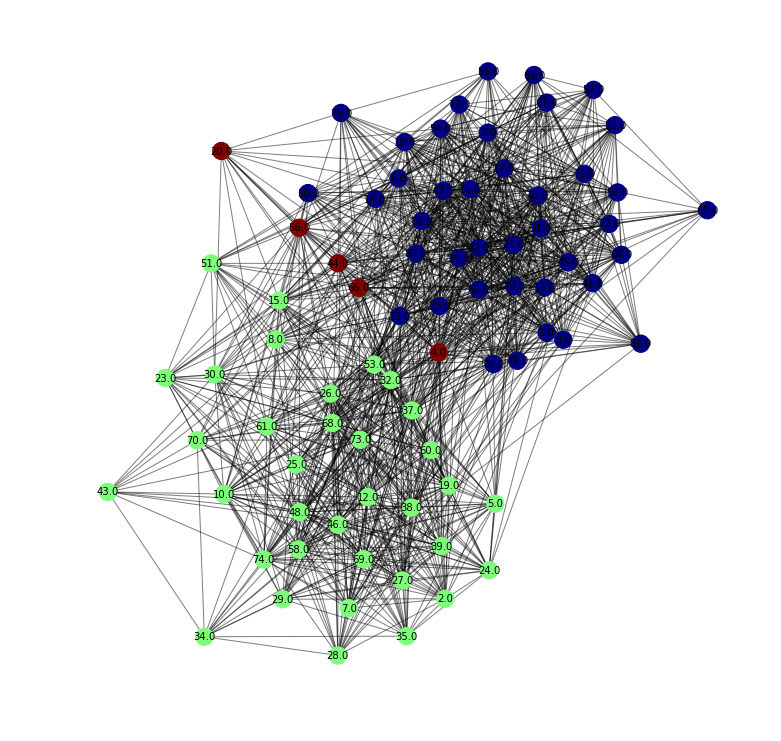

In [8]:
part = community.best_partition(G2)
values = [part.get(node) for node in G2.nodes()]

plt.figure(figsize=(13,13))
pos=nx.spring_layout(G2)
nx.draw_networkx_nodes(G2,pos,cmap = plt.get_cmap('jet'),node_color = values, )
nx.draw_networkx_labels(G2,pos,font_size=10,font_family='sans-serif')
nx.draw_networkx_edges(G2,pos,alpha=0.5)
plt.axis('off')
plt.show()


As seen above, the Louvain best partition method is more appropriate for analysing the structure of the Class network.

The Girvan Newman method identifies one member as a separate community, while keeping the rest of the members together. The Louvain best partition method, which searches for clusters, has more correctly identified two large groups and a third smaller group.
